This notebook provides an example of loading preprocessed data located on the cortex cluster.

In [50]:
import mne
import glob, os
import pickle

os.chdir("/home/jerryjin/moth-meg-dataset")  # just to make sure your current working directory is where the load_data.ipynb is located

In [51]:
# specify which recording to load
SUBJECT = "D"
SESSION = "Moth4"
VERSION = "sss_er-4-10-2-2_band-1-150_notch-60-120_ecg-ica_eog-ica"
BLOCK = "01"

#### Load a non-downsampled version

In [52]:
loc_raw = f"/project_data/volume0/jerryjin/moth_meg/{SESSION}/{VERSION}/{SUBJECT}/"
raw_file = glob.glob(loc_raw + f"*{BLOCK}*.fif")[0]
raw = mne.io.read_raw_fif(raw_file)

Opening raw data file /project_data/volume0/jerryjin/moth_meg/Moth4/sss_er-4-10-2-2_band-1-150_notch-60-120_ecg-ica_eog-ica/D/D_Moth4_01_sss_er-4-10-2-2_band-1-150_notch-60-120_ecg-ica_eog-ica_raw.fif...


    Read a total of 16 projection items:
        planar-Raw-56.200-66.200-PCA-01 (1 x 204) active
        planar-Raw-56.200-66.200-PCA-02 (1 x 204) active
        axial-Raw-56.200-66.200-PCA-01 (1 x 102) active
        axial-Raw-56.200-66.200-PCA-02 (1 x 102) active
        planar-Raw-117.400-127.400-PCA-01 (1 x 204) active
        planar-Raw-117.400-127.400-PCA-02 (1 x 204) active
        axial-Raw-117.400-127.400-PCA-01 (1 x 102) active
        axial-Raw-117.400-127.400-PCA-02 (1 x 102) active
        planar-Raw-178.600-188.600-PCA-01 (1 x 204) active
        planar-Raw-178.600-188.600-PCA-02 (1 x 204) active
        axial-Raw-178.600-188.600-PCA-01 (1 x 102) active
        axial-Raw-178.600-188.600-PCA-02 (1 x 102) active
        planar-Raw-239.800-249.800-PCA-01 (1 x 204) active
        planar-Raw-239.800-249.800-PCA-02 (1 x 204) active
        axial-Raw-239.800-249.800-PCA-01 (1 x 102) active
        axial-Raw-239.800-249.800-PCA-02 (1 x 102) active
    Range : 49000 ... 754999 = 

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


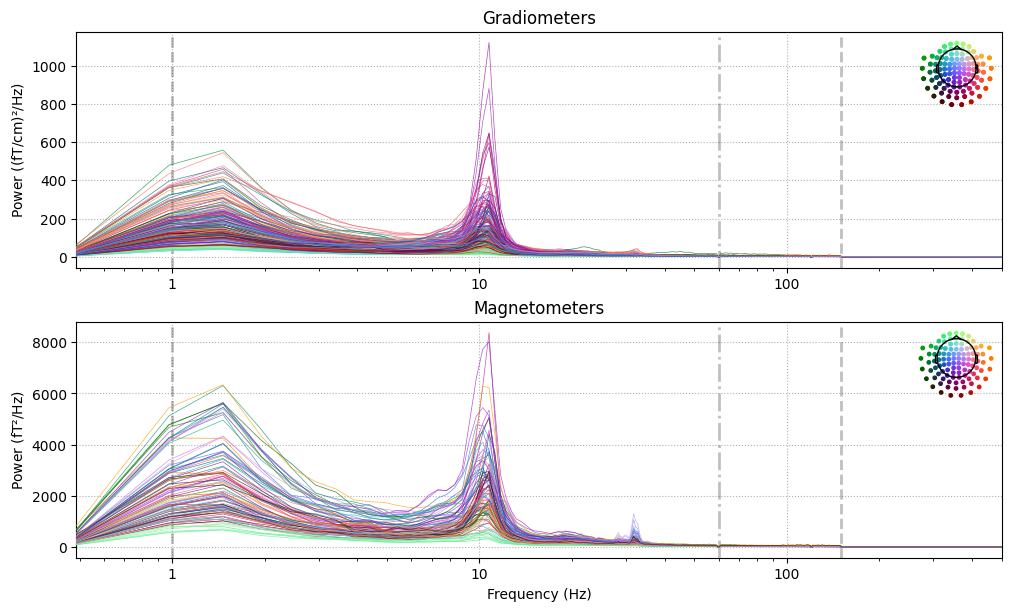

In [53]:
# plot the power specturm to visualize
spectrum = raw.compute_psd()
spectrum.plot(dB=False, xscale="log")

#### Load a downsampled version (50Hz)

In [54]:
loc_raw_ds = f"/project_data/volume0/jerryjin/moth_meg/{SESSION}/{VERSION}/{SUBJECT}/downsampled-50/"
raw_file_ds = glob.glob(loc_raw_ds + f"*{BLOCK}*.fif")[0]
raw_ds = mne.io.read_raw_fif(raw_file_ds)

Opening raw data file /project_data/volume0/jerryjin/moth_meg/Moth4/sss_er-4-10-2-2_band-1-150_notch-60-120_ecg-ica_eog-ica/D/downsampled-50/D_Moth4_01_sss_er-4-10-2-2_band-1-150_notch-60-120_ecg-ica_eog-ica_ds50_raw.fif...
    Read a total of 16 projection items:
        planar-Raw-56.200-66.200-PCA-01 (1 x 204) active
        planar-Raw-56.200-66.200-PCA-02 (1 x 204) active
        axial-Raw-56.200-66.200-PCA-01 (1 x 102) active
        axial-Raw-56.200-66.200-PCA-02 (1 x 102) active
        planar-Raw-117.400-127.400-PCA-01 (1 x 204) active
        planar-Raw-117.400-127.400-PCA-02 (1 x 204) active
        axial-Raw-117.400-127.400-PCA-01 (1 x 102) active
        axial-Raw-117.400-127.400-PCA-02 (1 x 102) active
        planar-Raw-178.600-188.600-PCA-01 (1 x 204) active
        planar-Raw-178.600-188.600-PCA-02 (1 x 204) active
        axial-Raw-178.600-188.600-PCA-01 (1 x 102) active
        axial-Raw-178.600-188.600-PCA-02 (1 x 102) active
        planar-Raw-239.800-249.800-PCA-01

Effective window size : 40.960 (s)
Plotting power spectral density (dB=False).


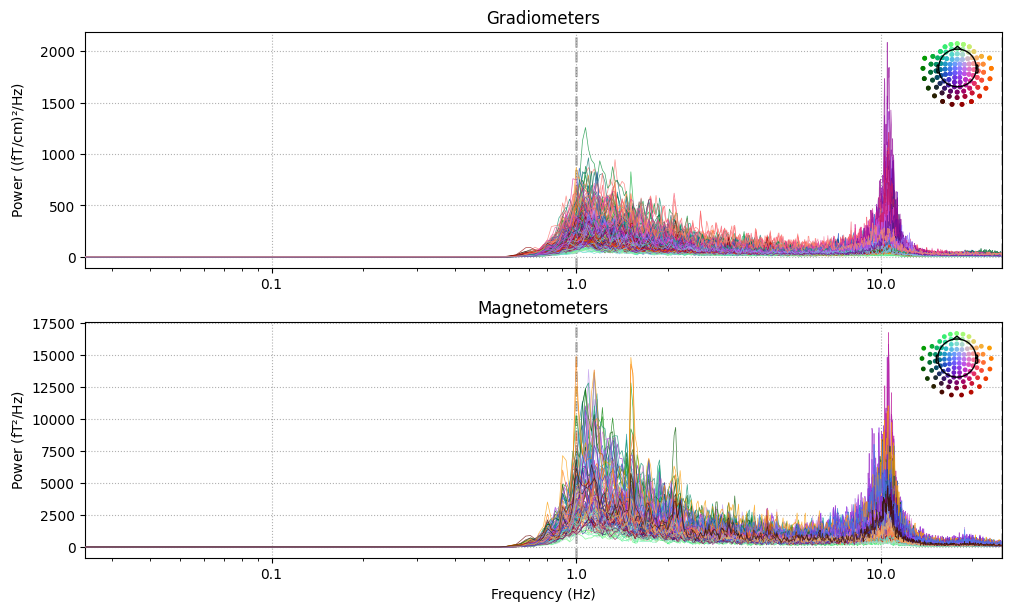

In [55]:
# plot the power specturm to visualize
spectrum_ds = raw_ds.compute_psd()
spectrum_ds.plot(dB=False, xscale="log")

### Load Delay Correction Coefficients and Correct the Timestamps

First, define some useful objects.

In [56]:
# You could define everything mannually
# stories in each session, in order
# session_stories_dict = dict(
#     Moth1=["stimuli_auditory_localizer", "alternateithicatom1", "souls", "wheretheressmoke1", "avatar", "legacy", "odetostepfather", "alternateithicatom2"],
#     Moth2=["undertheinfluence1", "howtodraw", "myfirstdaywiththeyankees", "wheretheressmoke2", "naked", "life", "undertheinfluence2"],
#     Moth3=["stagefright1", "tildeath", "wheretheressmoke3", "fromboyhoodtofatherhood", "sloth", "exorcism", "stagefright2"],
#     Moth4=["buck1", "adollshouse", "wheretheressmoke4", "inamoment", "theclosetthatateeverything", "adventuresinsayingyes", "haveyoumethimyet", "buck2"],
#     Moth5=["swimmingwithastronauts1", "thatthingonmyarm", "eyespy", "wheretheressmoke5", "itsabox", "hangtime", "swimmingwithastronauts2"],
# )

# story to session and block mapping
# story_sess_block = {}
# for SESSION in ["Moth1", "Moth2", "Moth3", "Moth4", "Moth5"]:
#     story_list = session_stories_dict[SESSION]
#     if SESSION == "Moth1" or SESSION == "Moth4":
#         all_blocks = ["01", "02", "03", "04", "05", "06", "07", "08"]
#     elif SESSION == "Moth2" or SESSION == "Moth3" or SESSION == "Moth5":
#         all_blocks = ["01", "02", "03", "04", "05", "06", "07"]
#     for story, block in zip(story_list, all_blocks):
#         story_sess_block[story] = (SESSION, block)

# story to unique story mapping
# all_stories = sum(list(session_stories_dict.values()), [])  # flatten list of lists
# story_to_uniquestory = {}
# for storyname in all_stories:
#     if storyname[-1].isdigit():
#         story_to_uniquestory[storyname] = storyname[:-1]
#     else:
#         story_to_uniquestory[storyname] = storyname

# the value in the stim channel that corresponds to the audio
# define it manually
# STIM_ON_VAL = {
#     "alternateithicatom1": 11.0,
#     "alternateithicatom2": 17.0,
#     "avatar": 14.0,
#     "legacy": 15.0,
#     "odetostepfather": 16.0,
#     "souls": 12.0,
#     "stimuli_auditory_localizer": 10.0,
#     "wheretheressmoke1": 13.0,
#     "howtodraw": 22.0,
#     "life": 26.0,
#     "myfirstdaywiththeyankees": 23.0,
#     "naked": 25.0,
#     "undertheinfluence1": 21.0,
#     "undertheinfluence2": 27.0,
#     "wheretheressmoke2": 24.0,
#     "stagefright1": 31.0,
#     "tildeath": 32.0,
#     "wheretheressmoke3": 33.0,
#     "fromboyhoodtofatherhood": 34.0,
#     "sloth": 35.0,
#     "exorcism": 36.0,
#     "stagefright2": 37,
#     "buck1": 41.0,
#     "adollshouse": 42.0,
#     "wheretheressmoke4": 43.0,
#     "inamoment": 44.0,
#     "theclosetthatateeverything": 45.0,
#     "adventuresinsayingyes": 46.0,
#     "haveyoumethimyet": 47.0,
#     "buck2": 48.0,
#     "swimmingwithastronauts1": 51.0,
#     "thatthingonmyarm": 52.0,
#     "eyespy": 53.0,
#     "wheretheressmoke5": 54.0,
#     "itsabox": 55.0,
#     "hangtime": 56.0,
#     "swimmingwithastronauts2": 57.0,
# }

# Save these object
# with open("support_data/session_stories_dict.pkl", "wb") as f:
#     pickle.dump(session_stories_dict, f)

# with open("support_data/story_sess_block.pkl", "wb") as f:
#     pickle.dump(story_sess_block, f)

# with open("support_data/story_to_uniquestory.pkl", "wb") as f:
#     pickle.dump(story_to_uniquestory, f)

# with open("support_data/stim_on_val.pkl", "wb") as f:
#     pickle.dump(STIM_ON_VAL, f)

In [67]:
# Or you could load them from the saved files
# stories in each session, in order
with open("support_data/session_stories_dict.pkl", "rb") as f:
    session_stories_dict = pickle.load(f)
print(session_stories_dict)

# story to session and block mapping
with open("support_data/story_sess_block.pkl", "rb") as f:
    story_sess_block = pickle.load(f)
print(story_sess_block)

# story to unique story mapping
with open("support_data/story_to_uniquestory.pkl", "rb") as f:
    story_to_uniquestory = pickle.load(f)
print(story_to_uniquestory)

# the value in the stim channel that corresponds to the audio
with open("support_data/stim_on_val.pkl", "rb") as f:
    STIM_ON_VAL = pickle.load(f)
print(STIM_ON_VAL)

{'Moth1': ['stimuli_auditory_localizer', 'alternateithicatom1', 'souls', 'wheretheressmoke1', 'avatar', 'legacy', 'odetostepfather', 'alternateithicatom2'], 'Moth2': ['undertheinfluence1', 'howtodraw', 'myfirstdaywiththeyankees', 'wheretheressmoke2', 'naked', 'life', 'undertheinfluence2'], 'Moth3': ['stagefright1', 'tildeath', 'wheretheressmoke3', 'fromboyhoodtofatherhood', 'sloth', 'exorcism', 'stagefright2'], 'Moth4': ['buck1', 'adollshouse', 'wheretheressmoke4', 'inamoment', 'theclosetthatateeverything', 'adventuresinsayingyes', 'haveyoumethimyet', 'buck2'], 'Moth5': ['swimmingwithastronauts1', 'thatthingonmyarm', 'eyespy', 'wheretheressmoke5', 'itsabox', 'hangtime', 'swimmingwithastronauts2']}
{'stimuli_auditory_localizer': ('Moth1', '01'), 'alternateithicatom1': ('Moth1', '02'), 'souls': ('Moth1', '03'), 'wheretheressmoke1': ('Moth1', '04'), 'avatar': ('Moth1', '05'), 'legacy': ('Moth1', '06'), 'odetostepfather': ('Moth1', '07'), 'alternateithicatom2': ('Moth1', '08'), 'underthein

In [68]:
# stimulus channel name and audio channel name, these need to be double checked each time
STIM_CH = "STI101"
AUDIO_CH = "MISC008"

In [69]:
# get the story name and unique story name for this block
story = session_stories_dict[SESSION][int(BLOCK) - 1]
story_unique = story_to_uniquestory[story]
story, story_unique

('undertheinfluence1', 'undertheinfluence')

In [70]:
# get the delay correction coefficients using non-unique story name
with open(f"/project_data/volume0/jerryjin/moth_meg/{SESSION}/delay_correction/coefficients/{SUBJECT}/{story}.pkl", "rb") as f:
    delay_correction_coefs = pickle.load(f)
delay_correction_coefs  # it is a dictionary

{'meg_sr': 1000,
 'initial_lag': 895.0227686847904,
 'initial_lag_time': 0.8950227686847905,
 'rate': 1.0004874197032814,
 'meg_acoustic_diff': -209,
 'meg_acoustic_diff_time': -0.209}

In [71]:
# get the two coefficients that we need
initial_lag_time = delay_correction_coefs["initial_lag_time"]
rate = delay_correction_coefs["rate"]

For example, we now want to do phoneme analysis.

In [72]:
# load phonemes for example
with open("/project_data/volume0/lwehbe/moth_meg/moth_phon_words.pkl", "rb") as fp:
    grid_transcript_phones = pickle.load(fp)

In [73]:
# get the phonemes and times for this story, but this timing is for original acoustic file
time_phones = grid_transcript_phones[story_unique]
time_phones[0:10]

[('0.0124716553288', '0.0224489795918', 'sp'),
 ('0.0224489795918', '0.0823129251701', 'IH1'),
 ('0.0823129251701', '0.132199546485', 'N'),
 ('0.132199546485', '0.231972789116', 'AO1'),
 ('0.231972789116', '0.341723356009', 'L'),
 ('0.341723356009', '0.441496598639', 'AA1'),
 ('0.441496598639', '0.471428571429', 'N'),
 ('0.471428571429', '0.511337868481', 'AH0'),
 ('0.511337868481', '0.621088435374', 'S'),
 ('0.621088435374', '0.670975056689', 'T')]

In [74]:
# correct the phoneme times for the delay in MEG
time_phones_corrected = [(float(t[0]) * rate + initial_lag_time, float(t[1]) * rate + initial_lag_time, t[2]) for t in time_phones]
time_phones_corrected[0:10]

[(0.9075005029441303, 0.917482690351562, 'sp'),
 (0.917482690351562, 0.9773758147964531, 'IH1'),
 (0.9773758147964531, 1.027286751833512, 'N'),
 (1.027286751833512, 1.1271086259088308, 'AO1'),
 (1.1271086259088308, 1.2369126873905807, 'L'),
 (1.2369126873905807, 1.3367345614648989, 'AA1'),
 (1.3367345614648989, 1.3666811236881948, 'N'),
 (1.3666811236881948, 1.406609873317922, 'AH0'),
 (1.406609873317922, 1.516413934799672, 'S'),
 (1.516413934799672, 1.566324871836831, 'T')]

In [75]:
# The time above is aligned to the onset of the stimulus channel, i.e., the times_audio here
stim_ch_data = raw_ds.copy().pick(STIM_CH).get_data()[0]
times_meg = raw_ds.times[stim_ch_data == STIM_ON_VAL[story]]
times_audio = times_meg - times_meg[0]
times_audio

array([0.0000e+00, 2.0000e-02, 4.0000e-02, ..., 6.2870e+02, 6.2872e+02,
       6.2874e+02])